In [1]:
import numpy as np # Numerical python, used for anything mathematics
import pandas as pd # Used for dataset manipulation
import matplotlib.pyplot as plt # Used for data visualization
import seaborn as sns # Used for data visualization
from sklearn.model_selection import train_test_split # Used to split the data set into training and testing
from sklearn.metrics import accuracy_score # for model's performance evaluation
from sklearn.feature_extraction.text import TfidfVectorizer #used for text processing
from sklearn.tree import DecisionTreeClassifier #algorithm for both regression and classification tasks
from sklearn.metrics import precision_score # for model's performance evaluation
from sklearn.metrics import recall_score # for model's performance evaluation
from sklearn.metrics import classification_report # Used to give a report on the predictions made using the model which includes accuracy, precision, recall e.t.c
from sklearn.ensemble import RandomForestClassifier # A model used for classification tasks
from xgboost import XGBClassifier # A model used for classification tasks
from sklearn.compose import ColumnTransformer # Used to transform the columns of the dataset
from sklearn.pipeline import Pipeline # Used in the organization of steps used in prediction of the data using the model

In [2]:
plane_data = pd.read_csv("/content/drive/MyDrive/DataSets/Plane Crashes.csv") #Importing our data set using the read_csv function from pandas

In [3]:
plane_data.head(10)# Getting the first 10 rows of the dataset

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
5,1918-07-14,NaN,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Isle of Grain - Usworth - Glasgow,...,United Kingdom,Europe,1.0,1.0,0.0,0.0,0.0,1,The pilot departed Isle of Grain on a delivery...,Unknown
6,1918-07-18,NaN,De Havilland DH.6,Royal Air Force - RAF,B3087,Flight,Training,No,Airport (less than 10 km from airport),Seaton Carew - Seaton Carew,...,United Kingdom,Europe,2.0,2.0,0.0,0.0,0.0,2,The crew was completing a local training fligh...,Unknown
7,1918-08-19,15H 15M 0S,Handley Page H.P.12,Royal Air Force - RAF,D4593,Flight,Test,No,"Plain, Valley",Castle Bromwich - Castle Bromwich,...,United Kingdom,Europe,2.0,2.0,5.0,5.0,0.0,7,The aircraft departed Castle Bromwich for a te...,Technical failure
8,1918-08-23,NaN,Tellier T.3,Portuguese Air Force - Aeronáutica Militar,5,Flight,Survey / Patrol / Reconnaissance,No,"Lake, Sea, Ocean, River",NaN,...,Portugal,Europe,2.0,2.0,0.0,0.0,0.0,2,The seaplane crashed in unknown circumstances ...,Unknown
9,1918-08-26,NaN,Blackburn R.T.1 Kangaroo,Royal Air Force - RAF,B9976,Landing (descent or approach),Military,Yes,Airport (less than 10 km from airport),Seaton Carew AFB - Seaton Carew AFB,...,United Kingdom,Europe,2.0,0.0,0.0,0.0,0.0,0,"On final approach in bad visibility, aircraft ...",Unknown


In [4]:
plane_data.columns # Getting the list of columns from the datset

Index(['Date', 'Time', 'Aircraft', 'Operator', 'Registration', 'Flight phase',
       'Flight type', 'Survivors', 'Crash site', 'Schedule', 'MSN', 'YOM',
       'Flight no.', 'Crash location', 'Country', 'Region', 'Crew on board',
       'Crew fatalities', 'Pax on board', 'PAX fatalities', 'Other fatalities',
       'Total fatalities', 'Circumstances', 'Crash cause'],
      dtype='object')

In [5]:
pd.set_option("display.max_columns", None) # Using a pandas function to display the maximum amount of columns in the dataset

In [6]:
plane_data

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,YOM,Flight no.,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,NaN,NaN,NaN,Dayton-McCook Field Ohio,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,NaN,1918.0,NaN,Cricklewood London Metropolis,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,NaN,NaN,NaN,Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,NaN,NaN,NaN,Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,NaN,NaN,NaN,France All France,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022-05-20,NaN,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Jundiaí – Eldorado do Sul,110-460,1985.0,NaN,Eldorado do Sul Rio Grande do Sul,Brazil,South America,2.0,0.0,0.0,0.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown
28532,2022-05-23,18H 29M 0S,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",Celaya - Durango,61-0277-061,1976.0,NaN,Durango Durango,Mexico,Central America,1.0,1.0,1.0,1.0,0.0,2,While approaching Durango Airport on a flight ...,Unknown
28533,2022-05-24,15H 40M 0S,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Yakutat – Dry Bay,456,1965.0,NaN,Dry Bay Alaska,United States of America,North America,1.0,0.0,3.0,0.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown
28534,2022-05-29,10H 7M 0S,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,Pokhara – Jomsom,619,1979.0,NaN,Shikha Dhawalagiri,Nepal,Asia,3.0,3.0,19.0,19.0,0.0,22,The twin engine airplane departed Pokhara City...,Human factor


In [7]:
plane_data.shape # Getting the shape of the dataset

(28536, 24)

In [8]:
plane_data.info() # Getting the various info located in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28536 entries, 0 to 28535
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              28536 non-null  object 
 1   Time              13949 non-null  object 
 2   Aircraft          28535 non-null  object 
 3   Operator          28536 non-null  object 
 4   Registration      27721 non-null  object 
 5   Flight phase      27898 non-null  object 
 6   Flight type       28479 non-null  object 
 7   Survivors         27239 non-null  object 
 8   Crash site        28153 non-null  object 
 9   Schedule          19590 non-null  object 
 10  MSN               24354 non-null  object 
 11  YOM               23225 non-null  float64
 12  Flight no.        0 non-null      float64
 13  Crash location    28524 non-null  object 
 14  Country           28535 non-null  object 
 15  Region            28535 non-null  object 
 16  Crew on board     28512 non-null  float6

In [9]:
plane_data.duplicated().sum() #Getting the sum of the duplicated values in the dataset

79

In [10]:
plane_data.drop_duplicates(inplace=True) # Using a pandas function to drop the duplicated values

In [11]:
plane_data.shape

(28457, 24)

In [12]:
plane_data.isnull().sum() #Getting the amount of null values located in each column of the dataset

Date                    0
Time                14517
Aircraft                1
Operator                0
Registration          810
Flight phase          631
Flight type            56
Survivors            1288
Crash site            378
Schedule             8901
MSN                  4167
YOM                  5292
Flight no.          28457
Crash location         12
Country                 1
Region                  1
Crew on board          24
Crew fatalities         1
Pax on board           54
PAX fatalities          1
Other fatalities       10
Total fatalities        0
Circumstances          25
Crash cause             0
dtype: int64

In [13]:
plane_data["Survivors"].value_counts() # Getting the various amount of survivors

Yes    15489
No     11680
Name: Survivors, dtype: int64

In [14]:
plane_data["Aircraft"].value_counts() # Getting the types of aircrafts in the dataset and their amounts

Douglas C-47 Skytrain (DC-3)    2161
PZL-Mielec AN-2                  789
Curtiss C-46 Commando            633
Avro 652 Anson                   531
De Havilland DH.60 Moth          450
                                ... 
Letov S-32                         1
Handley Page H.P.50 Heyford        1
Evangel 4500                       1
Pander S.4 Postjager               1
Learjet 75                         1
Name: Aircraft, Length: 1119, dtype: int64

In [15]:
plane_data['Operator'].value_counts() # Getting the various types of operators and their amounts

Royal Air Force - RAF                        2354
United States Air Force - USAF               1441
Aeroflot - Russian International Airlines    1369
United States Army Air Forces - USAAF        1341
United States Navy - USN                      652
                                             ... 
Mackey International Airlines                   1
Tiburon Aircraft                                1
National Jet Industries                         1
Jay B. Claster                                  1
GoJump Oceanside                                1
Name: Operator, Length: 8960, dtype: int64

In [16]:
plane_data['Crash cause'].value_counts() # Getting the types of crash causes and their amounts

Human factor                          9901
Unknown                               8956
Technical failure                     6193
Weather                               1524
Terrorism act, Hijacking, Sabotage    1258
Other causes                           625
Name: Crash cause, dtype: int64

In [17]:
plane_data["Flight type"].value_counts() # Getting the flight type and their amounts

Scheduled Revenue Flight                       6015
Military                                       4625
Training                                       3289
Cargo                                          2812
Private                                        2341
Charter/Taxi (Non Scheduled Revenue Flight)    1830
Executive/Corporate/Business                   1050
Survey / Patrol / Reconnaissance                894
Bombing                                         671
Positioning                                     671
Test                                            560
Spraying (Agricultural)                         498
Postal (mail)                                   494
Ferry                                           424
Supply                                          413
Government                                      246
Ambulance                                       228
Illegal (smuggling)                             224
Delivery                                        192
Demonstratio

In [18]:
plane_data.describe(include="O") # Using a pandas function to get specific details on the columns that use categorical data in the dataset

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,Crash location,Country,Region,Circumstances,Crash cause
count,28457,13940,28456,28457,27647,27826,28401,27169,28079,19556,24290,28445,28456,28456,28432,28457
unique,18562,1386,1119,8960,27281,5,31,2,6,15657,18572,14172,219,9,27704,6
top,1944-06-06,12H 0M 0S,Douglas C-47 Skytrain (DC-3),Royal Air Force - RAF,1,Flight,Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Waddington - Waddington,1,Atlantic Ocean All World,United States of America,North America,Crashed in unknown circumstances.,Human factor
freq,23,560,2161,2354,8,11435,6015,15489,13561,33,47,140,6795,8180,160,9901


In [19]:
plane_data.describe() # Using a pandas function to get specific details on the columns that use numerical data in the dataset

,YOM,Flight no.,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities
count,23165.000000,0.0,28433.000000,28456.000000,28403.000000,28456.000000,28447.000000,28457.000000
mean,1931.888150,NaN,3.052580,1.771261,7.717319,3.682984,0.109959,5.570475
std,285.852445,NaN,11.753665,2.520638,24.091162,15.298909,2.647903,16.725248
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1944.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1958.000000,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1974.000000,NaN,4.000000,3.000000,4.000000,1.000000,0.000000,5.000000
max,19567.000000,NaN,1924.000000,25.000000,509.000000,506.000000,297.000000,520.000000


In [20]:
# Extracting the year in the date column to a new column name year

#Before extract year into a new column, we have to convert the date column to date time format
plane_data["Date"] = pd.to_datetime(plane_data["Date"])
plane_data["Year"] = plane_data["Date"].dt.year

In [21]:
plane_data

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,YOM,Flight no.,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause,Year
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,NaN,NaN,NaN,Dayton-McCook Field Ohio,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure,1918
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,NaN,1918.0,NaN,Cricklewood London Metropolis,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,1918
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,NaN,NaN,NaN,Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown,1918
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,NaN,NaN,NaN,Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure,1918
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,NaN,NaN,NaN,France All France,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown,1918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022-05-20,NaN,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Jundiaí – Eldorado do Sul,110-460,1985.0,NaN,Eldorado do Sul Rio Grande do Sul,Brazil,South America,2.0,0.0,0.0,0.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown,2022
28532,2022-05-23,18H 29M 0S,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",Celaya - Durango,61-0277-061,1976.0,NaN,Durango Durango,Mexico,Central America,1.0,1.0,1.0,1.0,0.0,2,While approaching Durango Airport on a flight ...,Unknown,2022
28533,2022-05-24,15H 40M 0S,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Yakutat – Dry Bay,456,1965.0,NaN,Dry Bay Alaska,United States of America,North America,1.0,0.0,3.0,0.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown,2022
28534,2022-05-29,10H 7M 0S,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,Pokhara – Jomsom,619,1979.0,NaN,Shikha Dhawalagiri,Nepal,Asia,3.0,3.0,19.0,19.0,0.0,22,The twin engine airplane departed Pokhara City...,Human factor,2022


In [22]:
#Making the new year column to appear immediately after the date column
plane_data.insert(1, "year", plane_data["Year"])

In [23]:
plane_data

,Date,year,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,YOM,Flight no.,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause,Year
0,1918-05-02,1918,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,NaN,NaN,NaN,Dayton-McCook Field Ohio,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure,1918
1,1918-06-08,1918,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,NaN,1918.0,NaN,Cricklewood London Metropolis,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,1918
2,1918-06-11,1918,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,NaN,NaN,NaN,Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown,1918
3,1918-06-19,1918,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,NaN,NaN,NaN,Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure,1918
4,1918-06-24,1918,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,NaN,NaN,NaN,France All France,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown,1918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022-05-20,2022,NaN,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Jundiaí – Eldorado do Sul,110-460,1985.0,NaN,Eldorado do Sul Rio Grande do Sul,Brazil,South America,2.0,0.0,0.0,0.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown,2022
28532,2022-05-23,2022,18H 29M 0S,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",Celaya - Durango,61-0277-061,1976.0,NaN,Durango Durango,Mexico,Central America,1.0,1.0,1.0,1.0,0.0,2,While approaching Durango Airport on a flight ...,Unknown,2022
28533,2022-05-24,2022,15H 40M 0S,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Yakutat – Dry Bay,456,1965.0,NaN,Dry Bay Alaska,United States of America,North America,1.0,0.0,3.0,0.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown,2022
28534,2022-05-29,2022,10H 7M 0S,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,Pokhara – Jomsom,619,1979.0,NaN,Shikha Dhawalagiri,Nepal,Asia,3.0,3.0,19.0,19.0,0.0,22,The twin engine airplane departed Pokhara City...,Human factor,2022


In [24]:
plane_data.drop(columns = ["Year"], inplace = True)

In [25]:
plane_data.rename({"year" : "Year"}, axis = 1, inplace = True) # Renaming the year column to Year

In [26]:
plane_data.drop(columns = ["Date", "Time", "Schedule", "MSN", "YOM", "Flight no.", "Pax on board", "PAX fatalities", "Other fatalities"], inplace = True) # Dropping the columns that would'nt be used in the prediction

In [27]:
plane_data.groupby("Survivors")["Survivors"].count() # Grouping the data based on survivors in the surviors column

Survivors
No     11680
Yes    15489
Name: Survivors, dtype: int64

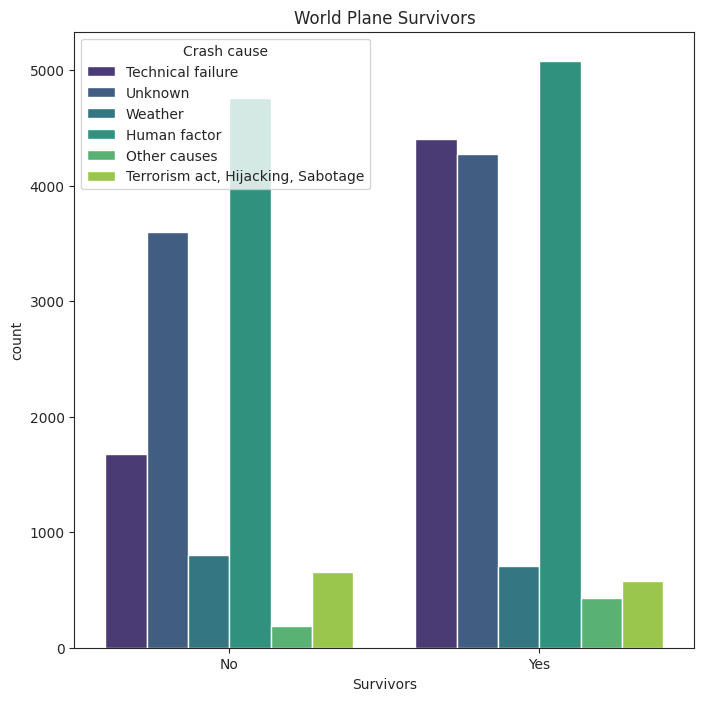

In [28]:
# Creating a plot based on the number of surviors and the various causes of the plane crash
plt.figure(figsize=(8, 8))
sns.set_style("ticks")
sns.countplot(data = plane_data, x = "Survivors", hue = "Crash cause", palette = "viridis")
plt.title("World Plane Survivors")
plt.show()

From this plot, we can see that there are more survivors in the history of plane crashes, and that human factor is the leading cause of the crashes, whether there are survivors or not.

In [29]:
plane_data.groupby("Crash cause")["Crash cause"].count() # Grouping the data based on crash cause in the crash cause column

Crash cause
Human factor                          9901
Other causes                           625
Technical failure                     6193
Terrorism act, Hijacking, Sabotage    1258
Unknown                               8956
Weather                               1524
Name: Crash cause, dtype: int64

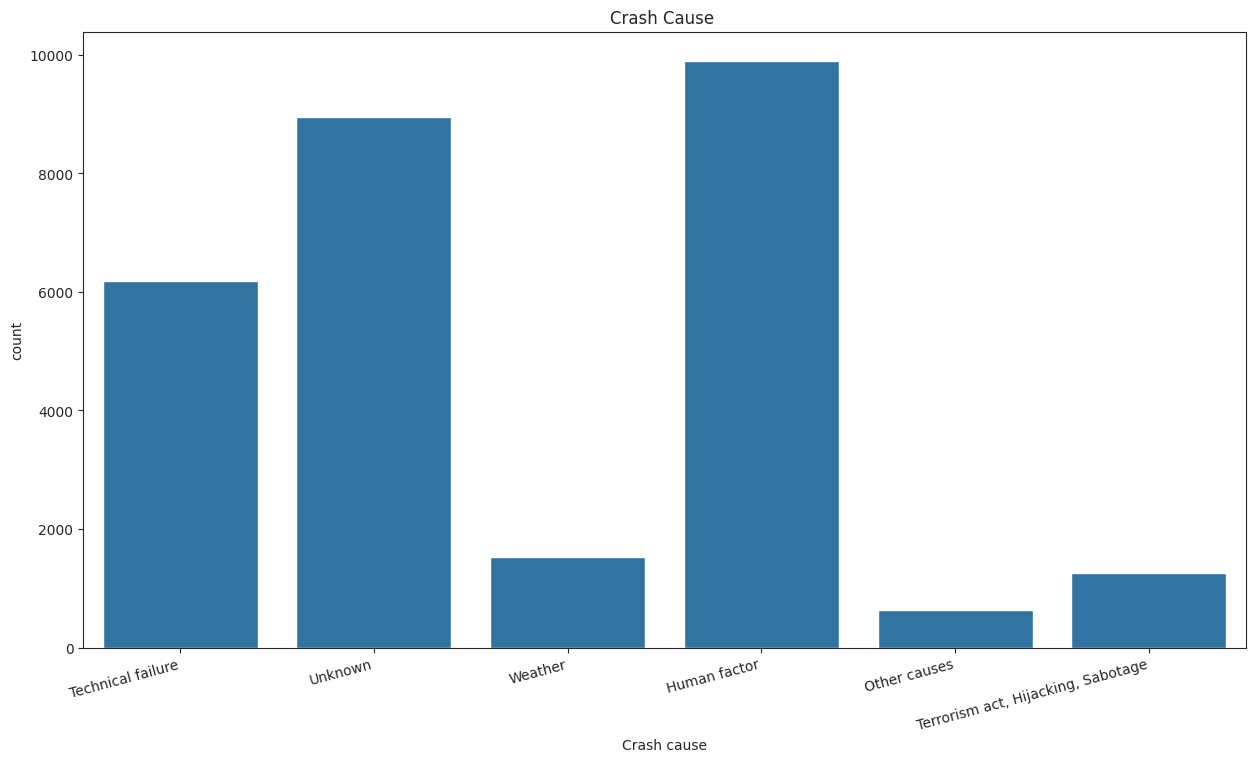

In [30]:
# Creating a  count plot based on the crash causes
plt.figure(figsize=(15, 8))
sns.set_style("ticks")
sns.countplot(data = plane_data, x = "Crash cause")
plt.title("Crash Cause ")
plt.xticks(rotation = 15, ha = "right")
plt.show()

From this plot, we can see that Human factor is the leading crash cause.

In [31]:
plane_data.groupby("Region")["Region"].count()# Grouping the data based on Region in the Region column

Region
Africa             2083
Antarctica           57
Asia               5681
Central America    1309
Europe             6667
North America      8180
Oceania            1309
South America      2573
World               597
Name: Region, dtype: int64

<ipython-input-32-ba880611a2e8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = plane_data, x = "Region", palette = "viridis")


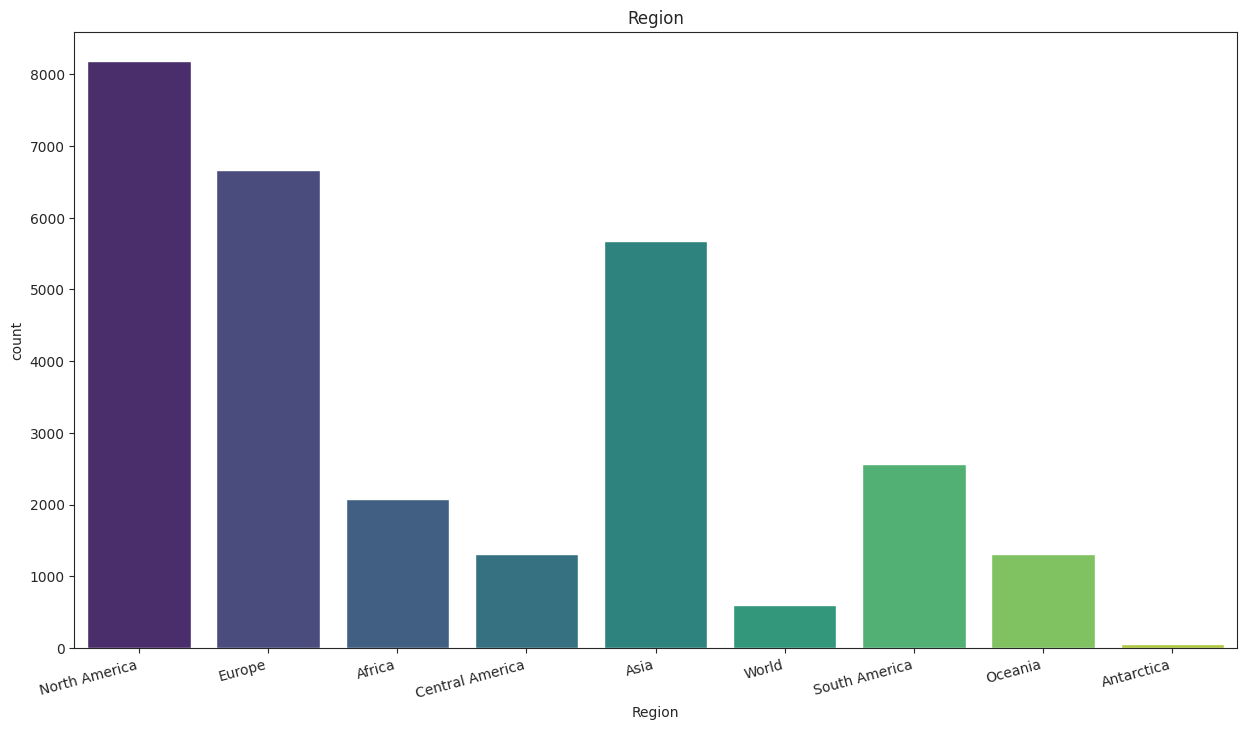

In [32]:
# Creating a count plot based on the regions in which the plane crashes have occured in history
plt.figure(figsize=(15, 8))
sns.set_style("ticks")
sns.countplot(data = plane_data, x = "Region", palette = "viridis")
plt.title("Region")
plt.xticks(rotation = 15, ha = "right")
plt.show()

From this plot, we can see that North America has the highest amount of plane crashes in history and Antartica has the lowest amount

In [33]:
plane_data

,Year,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Crash location,Country,Region,Crew on board,Crew fatalities,Total fatalities,Circumstances,Crash cause
0,1918,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton-McCook Field Ohio,United States of America,North America,2.0,2.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood London Metropolis,United Kingdom,Europe,6.0,5.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,1.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,1.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,France All France,France,Europe,NaN,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28531,2022,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Eldorado do Sul Rio Grande do Sul,Brazil,South America,2.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown
28532,2022,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",Durango Durango,Mexico,Central America,1.0,1.0,2,While approaching Durango Airport on a flight ...,Unknown
28533,2022,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Dry Bay Alaska,United States of America,North America,1.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown
28534,2022,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,Shikha Dhawalagiri,Nepal,Asia,3.0,3.0,22,The twin engine airplane departed Pokhara City...,Human factor


In [34]:
plane_data.dropna(inplace = True) # Dropping the null values located in the dataset

In [35]:
plane_data.isnull().sum()

Year                0
Aircraft            0
Operator            0
Registration        0
Flight phase        0
Flight type         0
Survivors           0
Crash site          0
Crash location      0
Country             0
Region              0
Crew on board       0
Crew fatalities     0
Total fatalities    0
Circumstances       0
Crash cause         0
dtype: int64

In [36]:
plane_data.reset_index(inplace = True) # Resetting the index due to the dropping of the null values

In [37]:
plane_data

,index,Year,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Crash location,Country,Region,Crew on board,Crew fatalities,Total fatalities,Circumstances,Crash cause
0,0,1918,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton-McCook Field Ohio,United States of America,North America,2.0,2.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1,1918,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood London Metropolis,United Kingdom,Europe,6.0,5.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,2,1918,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,1.0,1,The single engine aircraft was completing a lo...,Unknown
3,3,1918,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,1.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,5,1918,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Usworth AFB (RAF Hylton) Tyne and Wear,United Kingdom,Europe,1.0,1.0,1,The pilot departed Isle of Grain on a delivery...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26076,28531,2022,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,PT-SHN,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Eldorado do Sul Rio Grande do Sul,Brazil,South America,2.0,0.0,0,The airplane departed Jundiaí on a cargo fligh...,Unknown
26077,28532,2022,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,N66CG,Flight,Private,No,"Plain, Valley",Durango Durango,Mexico,Central America,1.0,1.0,2,While approaching Durango Airport on a flight ...,Unknown
26078,28533,2022,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,N703TH,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Dry Bay Alaska,United States of America,North America,1.0,0.0,0,The single engine airplane departed Yakutat on...,Unknown
26079,28534,2022,De Havilland DHC-6 Twin Otter,Tara Air,9N-AET,Flight,Scheduled Revenue Flight,No,Mountains,Shikha Dhawalagiri,Nepal,Asia,3.0,3.0,22,The twin engine airplane departed Pokhara City...,Human factor


In [38]:
plane_data.drop(columns = ["Registration","index", "Crew fatalities", "Total fatalities" ], inplace = True) # Dropping the columns that would not be used in the prediction

In [39]:
plane_data

,Year,Aircraft,Operator,Flight phase,Flight type,Survivors,Crash site,Crash location,Country,Region,Crew on board,Circumstances,Crash cause
0,1918,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton-McCook Field Ohio,United States of America,North America,2.0,The single engine airplane departed Dayton-McC...,Technical failure
1,1918,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood London Metropolis,United Kingdom,Europe,6.0,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918,Avro 504,Royal Air Force - RAF,Flight,Training,Yes,"Plain, Valley",Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,The single engine aircraft was completing a lo...,Unknown
3,1918,De Havilland DH.4,United States Signal Corps - USSC,Flight,Military,No,Airport (less than 10 km from airport),Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918,Fairey III,Marine Aeroplane Depot,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Usworth AFB (RAF Hylton) Tyne and Wear,United Kingdom,Europe,1.0,The pilot departed Isle of Grain on a delivery...,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26076,2022,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Eldorado do Sul Rio Grande do Sul,Brazil,South America,2.0,The airplane departed Jundiaí on a cargo fligh...,Unknown
26077,2022,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,Flight,Private,No,"Plain, Valley",Durango Durango,Mexico,Central America,1.0,While approaching Durango Airport on a flight ...,Unknown
26078,2022,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Dry Bay Alaska,United States of America,North America,1.0,The single engine airplane departed Yakutat on...,Unknown
26079,2022,De Havilland DHC-6 Twin Otter,Tara Air,Flight,Scheduled Revenue Flight,No,Mountains,Shikha Dhawalagiri,Nepal,Asia,3.0,The twin engine airplane departed Pokhara City...,Human factor


In [40]:
plane_data.insert(13,"survivors", plane_data["Survivors"] ) # Inserting survivors as the last column

In [41]:
plane_data

,Year,Aircraft,Operator,Flight phase,Flight type,Survivors,Crash site,Crash location,Country,Region,Crew on board,Circumstances,Crash cause,survivors
0,1918,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton-McCook Field Ohio,United States of America,North America,2.0,The single engine airplane departed Dayton-McC...,Technical failure,No
1,1918,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood London Metropolis,United Kingdom,Europe,6.0,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,Yes
2,1918,Avro 504,Royal Air Force - RAF,Flight,Training,Yes,"Plain, Valley",Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,The single engine aircraft was completing a lo...,Unknown,Yes
3,1918,De Havilland DH.4,United States Signal Corps - USSC,Flight,Military,No,Airport (less than 10 km from airport),Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure,No
4,1918,Fairey III,Marine Aeroplane Depot,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Usworth AFB (RAF Hylton) Tyne and Wear,United Kingdom,Europe,1.0,The pilot departed Isle of Grain on a delivery...,Unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26076,2022,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,Landing (descent or approach),Cargo,Yes,Airport (less than 10 km from airport),Eldorado do Sul Rio Grande do Sul,Brazil,South America,2.0,The airplane departed Jundiaí on a cargo fligh...,Unknown,Yes
26077,2022,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,Flight,Private,No,"Plain, Valley",Durango Durango,Mexico,Central America,1.0,While approaching Durango Airport on a flight ...,Unknown,No
26078,2022,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Dry Bay Alaska,United States of America,North America,1.0,The single engine airplane departed Yakutat on...,Unknown,Yes
26079,2022,De Havilland DHC-6 Twin Otter,Tara Air,Flight,Scheduled Revenue Flight,No,Mountains,Shikha Dhawalagiri,Nepal,Asia,3.0,The twin engine airplane departed Pokhara City...,Human factor,No


In [42]:
plane_data.drop(columns = ["Survivors", "Year", "Flight type", "Crash site", "Crash location", "Country", "Region", "Crew on board"], inplace = True)

In [43]:
plane_data

,Aircraft,Operator,Flight phase,Circumstances,Crash cause,survivors
0,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),The single engine airplane departed Dayton-McC...,Technical failure,No
1,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,Yes
2,Avro 504,Royal Air Force - RAF,Flight,The single engine aircraft was completing a lo...,Unknown,Yes
3,De Havilland DH.4,United States Signal Corps - USSC,Flight,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure,No
4,Fairey III,Marine Aeroplane Depot,Landing (descent or approach),The pilot departed Isle of Grain on a delivery...,Unknown,No
...,...,...,...,...,...,...
26076,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,Landing (descent or approach),The airplane departed Jundiaí on a cargo fligh...,Unknown,Yes
26077,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,Flight,While approaching Durango Airport on a flight ...,Unknown,No
26078,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,Landing (descent or approach),The single engine airplane departed Yakutat on...,Unknown,Yes
26079,De Havilland DHC-6 Twin Otter,Tara Air,Flight,The twin engine airplane departed Pokhara City...,Human factor,No


In [44]:
plane_data.rename({"survivors":"Survivors"}, axis = 1, inplace = True) # Renaming the surviors column into Survivors

In [45]:
#Feature Engineering stage : Data Preprocessing
#Converting the category column to numerical values: Yes = 1, No = 0
mapping = {"Yes" : 1, "No" : 0}
#converting categorical string values to numeric values using map() function
plane_data["Survivors"] = plane_data["Survivors"].map(mapping)

In [46]:
plane_data

,Aircraft,Operator,Flight phase,Circumstances,Crash cause,Survivors
0,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),The single engine airplane departed Dayton-McC...,Technical failure,0
1,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,1
2,Avro 504,Royal Air Force - RAF,Flight,The single engine aircraft was completing a lo...,Unknown,1
3,De Havilland DH.4,United States Signal Corps - USSC,Flight,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure,0
4,Fairey III,Marine Aeroplane Depot,Landing (descent or approach),The pilot departed Isle of Grain on a delivery...,Unknown,0
...,...,...,...,...,...,...
26076,Embraer EMB-110 Bandeirante,Sales Serviços Aéreos,Landing (descent or approach),The airplane departed Jundiaí on a cargo fligh...,Unknown,1
26077,Piper PA-61 Aerostar (Ted Smith 601),Raul Ignacion Posada,Flight,While approaching Durango Airport on a flight ...,Unknown,0
26078,De Havilland DHC-3 Otter,Yakutat Coastal Airlines,Landing (descent or approach),The single engine airplane departed Yakutat on...,Unknown,1
26079,De Havilland DHC-6 Twin Otter,Tara Air,Flight,The twin engine airplane departed Pokhara City...,Human factor,0


In [47]:
#Creating a process the would involve a pipeline which contains a text processor and the various columns the it would work on
processing_1 = [("processing_1", Pipeline([("TfidVectorizer", TfidfVectorizer())]),"Aircraft"),
                 ("processing_2", Pipeline([("TfidVectorizer", TfidfVectorizer())]), "Operator"),
                 ("processing_3", Pipeline([("TfidVectorizer", TfidfVectorizer())]), "Flight phase"),
                ("processing_4", Pipeline([("TfidVectorizer", TfidfVectorizer())]), "Circumstances"),
                ("processing_5", Pipeline([("Tfidvectorizer", TfidfVectorizer())]), "Crash cause")]

In [48]:
# Using the column transformer to transform the columns
preprocessor = ColumnTransformer(transformers = processing_1)

In [49]:
#Creating a variable that uses a pipeline(which contains the column transformer and the classifier we would be working with)
pipeline = Pipeline(steps = [("preprocessor", preprocessor), ("classifier", XGBClassifier())])

In [50]:
# Splitting the columns from the dataset and storing them in two varibles x and y
x = plane_data[plane_data.columns[:-1]]
y = plane_data[plane_data.columns[-1]]

In [51]:
#Splitting our dataset into X_train, X_test, y_train, y_test using  train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [52]:
# Fitting the training data into our pipeline variable that contains the column transfer and the classifier that we would be working with
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('processing_1',
                                                  Pipeline(steps=[('TfidVectorizer',
                                                                   TfidfVectorizer())]),
                                                  'Aircraft'),
                                                 ('processing_2',
                                                  Pipeline(steps=[('TfidVectorizer',
                                                                   TfidfVectorizer())]),
                                                  'Operator'),
                                                 ('processing_3',
                                                  Pipeline(steps=[('TfidVectorizer',
                                                                   TfidfVectorizer())]),
                                                  'Flight phase'),
                                                 ('processing_4',
                                                  Pipeline(steps=[('...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [53]:
# Using the model to get prediction data and storing it the variable pred
pred = pipeline.predict(X_test)

In [54]:
# Printing out the classification report which contains comparisons between our prediction data and our test data
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2272
           1       0.96      0.97      0.97      2945

    accuracy                           0.96      5217
   macro avg       0.96      0.96      0.96      5217
weighted avg       0.96      0.96      0.96      5217



As you can see from the classification report, we used our model to predict the values of our testing data while only fitting in our training data. The accuracy was 96%, which is relatively good for a model. The recall score, precision score, and F1 score also got a score of at least 95 and at most 97, which is also relatively good.

In [55]:
#Creating another pipeline but changing the classifer that we would be using and storing it in another variable
pipeline_2 = Pipeline(steps = [("preprocessor", preprocessor), ("classifier", RandomForestClassifier())])

In [56]:
# Fitting our training data into the pipeline
pipeline_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('processing_1',
                                                  Pipeline(steps=[('TfidVectorizer',
                                                                   TfidfVectorizer())]),
                                                  'Aircraft'),
                                                 ('processing_2',
                                                  Pipeline(steps=[('TfidVectorizer',
                                                                   TfidfVectorizer())]),
                                                  'Operator'),
                                                 ('processing_3',
                                                  Pipeline(steps=[('TfidVectorizer',
                                                                   TfidfVectorizer())]),
                                                  'Flight phase'),
                                                 ('processing_4',
                                                  Pipeline(steps=[('TfidVectorizer',
                                                                   TfidfVectorizer())]),
                                                  'Circumstances'),
                                                 ('processing_5',
                                                  Pipeline(steps=[('Tfidvectorizer',
                                                                   TfidfVectorizer())]),
                                                  'Crash cause')])),
                ('classifier', RandomForestClassifier())])

In [57]:
# Using our model to get the prediction data
pred_2 = pipeline_2.predict(X_test)

In [58]:
print(classification_report(y_test, pred_2))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2272
           1       0.93      0.94      0.93      2945

    accuracy                           0.92      5217
   macro avg       0.92      0.92      0.92      5217
weighted avg       0.92      0.92      0.92      5217



As you can see from the classification report, we used our model to predict the values of our testing data while only fitting in our training data, which was the same for our other model that used the XGBClassifier, while this one uses the RandomForestClassifier. The accuracy was 93%, which is not as good as the accuracy of the other model, but still a good model. The recall score, precision score, and F1 score also got a score of at least 91 and at most 94, which is also relatively good.

In [60]:
# Using real life data for the prediction
# Created a variable named data that contains the data that we would be using stored in dictionary format
data = {
    "Aircraft" : "De Havilland DHC-3 Otter",
    "Operator" : "Yakutat Coastal Airlines",
    "Flight phase" : "Landing (descent or approach)",
    "Circumstances" : "The single engine airplane departed Yakutat on an on-demand flight to Dry Bay, a remote airstrip located about 30 miles southeast of the Southeast Alaska community of Yakutat. On final approach, the aircraft crashed in a wooded area located short of runway. All four occupants were injured, three critically.",
    "Crash cause" : "Unknown"
}
# Converting the data to a DataFrame using the pandas function pd.DataFrame, while specifing the columns and the index
data = pd.DataFrame(data, columns=["Aircraft", "Operator", "Flight phase", "Circumstances", "Crash cause"], index = [0])

# Create a ColumnTransformer to handle different column types
processing_1 = [("processing_1", Pipeline([("TfidVectorizer", TfidfVectorizer())]),"Aircraft"),
                 ("processing_2", Pipeline([("TfidVectorizer", TfidfVectorizer())]), "Operator"),
                 ("processing_3", Pipeline([("TfidVectorizer", TfidfVectorizer())]), "Flight phase"),
                ("processing_4", Pipeline([("TfidVectorizer", TfidfVectorizer())]), "Circumstances"),
                ("processing_5", Pipeline([("Tfidvectorizer", TfidfVectorizer())]), "Crash cause")]

ct = ColumnTransformer(transformers = processing_1)

# Create a pipeline that combines the ColumnTransformer and the XGBClassifier model
pipeline = Pipeline([
        ('prep', ct),
        ('model', XGBClassifier())
    ])

# Fit the pipeline on the training data
# Note: This assumes that the training data is available in a separate variable called "training_data"

# Predict the outcome for the new data point
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(data)

# Print the prediction
print(prediction)

if(prediction== 0):
  print("There are no survivors")
else:
  print("There are survivors")

print()
print()

[1]
There are survivors


